In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
csvfile = "Resources/heart_disease_health_indicators_BRFSS2015.csv"

initial_df = pd.read_csv(csvfile)
initial_df.head(5)

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:
initial_df.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [4]:
initial_df.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [5]:
heart_attack_mapping = pd.DataFrame({"HeartDiseaseorAttack":[0,1],
                                    "HeartDisease": ["No heart disease", "Had heart disease or attack"]})
heart_attack_mapping

,HeartDiseaseorAttack,HeartDisease
0,0,No heart disease
1,1,Had heart disease or attack


In [6]:
income_mapping = pd.DataFrame({"Income":[1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0],
                               "IncomeBracket": ["10,000 or less","10,001-19,999","20,001-29,999","30,001-39,999","40,001-49,999","50,001-59,999","60,001-74,999","75000 or more"]})
income_mapping

,Income,IncomeBracket
0,1.0,"10,000 or less"
1,2.0,"10,001-19,999"
2,3.0,"20,001-29,999"
3,4.0,"30,001-39,999"
4,5.0,"40,001-49,999"
5,6.0,"50,001-59,999"
6,7.0,"60,001-74,999"
7,8.0,75000 or more


In [7]:
sex_mapping = pd.DataFrame({"Sex":[0,1],
                            "Gender":["Female", "Male"]})
sex_mapping

,Sex,Gender
0,0,Female
1,1,Male


In [8]:
age_mapping = pd.DataFrame({"Age":[1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0],
            "AgeBracket": ["18 to 24","25 to 29","30 to 34","35 to 39","40 to 44","45 to 49","50 to 54","55 to 59","60 to 64","65 to 69","70 to 74","75 to 79","80 or older"]})
age_mapping


,Age,AgeBracket
0,1.0,18 to 24
1,2.0,25 to 29
2,3.0,30 to 34
3,4.0,35 to 39
4,5.0,40 to 44
5,6.0,45 to 49
6,7.0,50 to 54
7,8.0,55 to 59
8,9.0,60 to 64
9,10.0,65 to 69


In [9]:
healthcare_mapping = pd.DataFrame({"AnyHealthcare": [0,1],
                                 "HealthCare":["No health care access", "With health insurance"]})

healthcare_mapping

,AnyHealthcare,HealthCare
0,0,No health care access
1,1,With health insurance


In [11]:
mapped_df = pd.merge(initial_df, heart_attack_mapping, on= "HeartDiseaseorAttack" )
mapped_df = pd.merge(mapped_df, income_mapping, on="Income")
mapped_df = pd.merge(mapped_df, sex_mapping, on="Sex")
mapped_df = pd.merge(mapped_df, age_mapping, on="Age")
mapped_df = pd.merge(mapped_df, healthcare_mapping, on="AnyHealthcare")
mapped_df.tail(2)

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,DiffWalk,Sex,Age,Education,Income,HeartDisease,IncomeBracket,Gender,AgeBracket,HealthCare
253678,0.0,0.0,0.0,1.0,22.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,6.0,5.0,No heart disease,"40,001-49,999",Male,18 to 24,No health care access
253679,0.0,0.0,0.0,1.0,20.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,5.0,5.0,No heart disease,"40,001-49,999",Male,18 to 24,No health care access


In [12]:
income_analysis_df = mapped_df[["HeartDiseaseorAttack","HeartDisease",
                                "Income","IncomeBracket",
                                "AnyHealthcare","HealthCare",
                                "Age","AgeBracket",
                                "Sex","Gender"]]
income_analysis_df.head()

,HeartDiseaseorAttack,HeartDisease,Income,IncomeBracket,AnyHealthcare,HealthCare,Age,AgeBracket,Sex,Gender
0,0.0,No heart disease,3.0,"20,001-29,999",1.0,With health insurance,9.0,60 to 64,0.0,Female
1,0.0,No heart disease,3.0,"20,001-29,999",1.0,With health insurance,9.0,60 to 64,0.0,Female
2,0.0,No heart disease,3.0,"20,001-29,999",1.0,With health insurance,9.0,60 to 64,0.0,Female
3,0.0,No heart disease,3.0,"20,001-29,999",1.0,With health insurance,9.0,60 to 64,0.0,Female
4,0.0,No heart disease,3.0,"20,001-29,999",1.0,With health insurance,9.0,60 to 64,0.0,Female


In [13]:
WithHeartAttack_group = income_analysis_df.loc[income_analysis_df["HeartDiseaseorAttack"] == 1.0]
len(WithHeartAttack_group)

23893

In [14]:
NoHeartAttack_group = income_analysis_df.loc[income_analysis_df["HeartDiseaseorAttack"] == 0.0]
len(NoHeartAttack_group)

229787

In [16]:
data1 = (WithHeartAttack_group.groupby("IncomeBracket")
        .agg({'HeartDiseaseorAttack': 'count'})
        
        .sort_values(["IncomeBracket"], ascending=True))

data1

,HeartDiseaseorAttack
IncomeBracket,
"10,000 or less",1553
"10,001-19,999",2197
"20,001-29,999",2519
"30,001-39,999",2828
"40,001-49,999",3161
"50,001-59,999",3646
"60,001-74,999",3404
75000 or more,4585


In [17]:
data2 = (NoHeartAttack_group.groupby("IncomeBracket")
        .agg({'HeartDiseaseorAttack': 'count'})        
        .sort_values(["IncomeBracket"], ascending=True))

data2

,HeartDiseaseorAttack
IncomeBracket,
"10,000 or less",8258
"10,001-19,999",9586
"20,001-29,999",13475
"30,001-39,999",17307
"40,001-49,999",22722
"50,001-59,999",32824
"60,001-74,999",39815
75000 or more,85800


In [69]:
final_df = pd.merge(data1, data2, on="IncomeBracket")
final_df["Total per IncomeBracket"]= final_df["HeartDiseaseorAttack_x"] + final_df["HeartDiseaseorAttack_y"]

final_df["Percent of With Heart Disease"] = ((final_df["HeartDiseaseorAttack_x"] / final_df["Total per IncomeBracket"])*100).map("{:.0f}".format)
final_df["Percent of No Heart Disease"] = ((final_df["HeartDiseaseorAttack_y"] / final_df["Total per IncomeBracket"])*100).map("{:.0f}".format)
final_df

,HeartDiseaseorAttack_x,HeartDiseaseorAttack_y,Total per IncomeBracket,Percent of With Heart Disease,Percent of No Heart Disease
IncomeBracket,,,,,
"10,000 or less",1553,8258,9811,16,84
"10,001-19,999",2197,9586,11783,19,81
"20,001-29,999",2519,13475,15994,16,84
"30,001-39,999",2828,17307,20135,14,86
"40,001-49,999",3161,22722,25883,12,88
"50,001-59,999",3646,32824,36470,10,90
"60,001-74,999",3404,39815,43219,8,92
75000 or more,4585,85800,90385,5,95


In [78]:
income_brackets = [income for income in income_mapping["IncomeBracket"]]
income_codes=[code for code in income_mapping["Income"]]
percent_heart_disease = [int(percent) for percent in final_df["Percent of With Heart Disease"]]
percent_no_heart_disease = [int(percent) for percent in final_df["Percent of No Heart Disease"]]
percent_no_heart_disease




[84, 81, 84, 86, 88, 90, 92, 95]

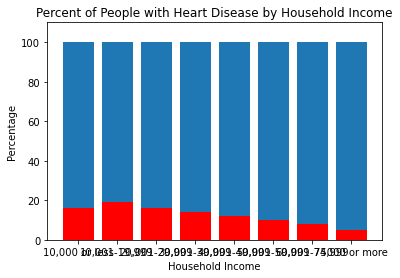

In [95]:
loc = np.arange(8)

bar1 = plt.bar(loc,percent_heart_disease, color="red", width=.8)
bar2 = plt.bar(loc,percent_no_heart_disease, bottom=percent_heart_disease, width=.8)

plt.title("Percent of People with Heart Disease by Household Income")
plt.xlabel("Household Income")
plt.ylabel("Percentage")
plt.ylim(0,110)

plt.xticks(loc,(income_brackets))

plt.show()
